In [3]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/drinks.csv')
df.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion
0,0,Afghanistan,0,0,0,0.0,muslim mostly
1,1,Albania,89,132,54,4.9,muslim mostly
2,2,Algeria,25,0,14,0.7,christian mostly
3,3,Andorra,245,138,312,12.4,christian mostly
4,4,Angola,217,57,45,5.9,christian mostly


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion
0,Afghanistan,0,0,0,0.0,muslim mostly
1,Albania,89,132,54,4.9,muslim mostly
2,Algeria,25,0,14,0.7,christian mostly
3,Andorra,245,138,312,12.4,christian mostly
4,Angola,217,57,45,5.9,christian mostly


In [6]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [7]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
religion                         object
dtype: object

In [8]:
# Chechking null values 
def missing_values(df):
    total_missing_values = df.isnull().sum().reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'total missing'})
    total_missing_values.head()
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values

In [9]:
# There is no missing value. Luck for us :D
missing_values(df)

,columns,total missing,ration of missing
0,country,0,0.0
1,beer_servings,0,0.0
2,spirit_servings,0,0.0
3,wine_servings,0,0.0
4,total_litres_of_pure_alcohol,0,0.0
5,religion,0,0.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

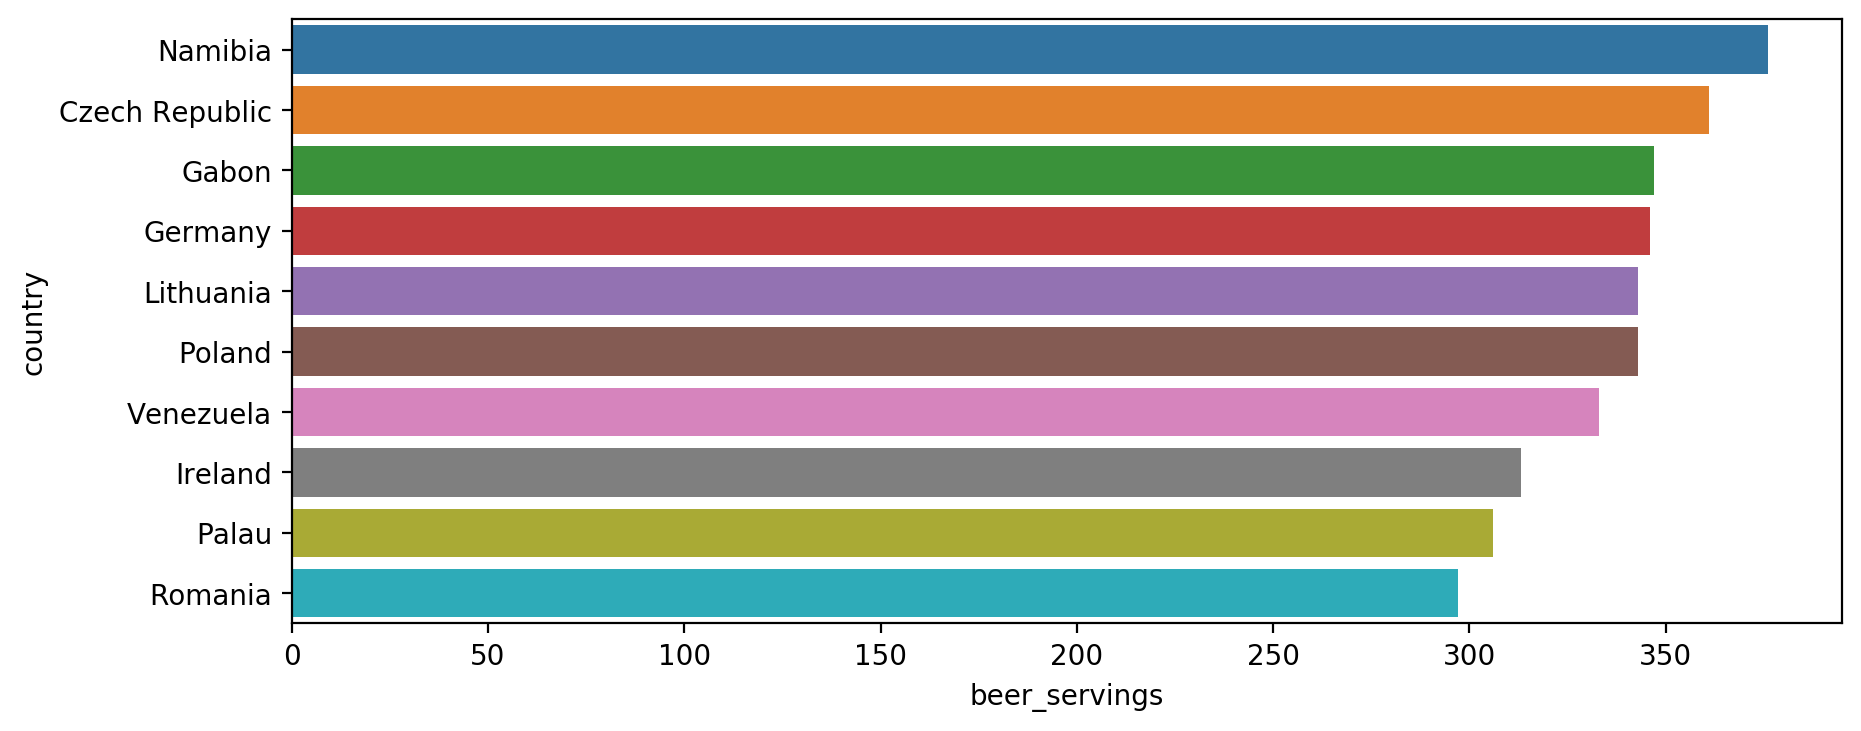

In [10]:
#Top 10 beer serving countries
beer = df.groupby("country")["beer_servings"].max().reset_index().sort_values(by='beer_servings',ascending=False)[:10]
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(y='country',x="beer_servings",data=beer)
plt.yticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

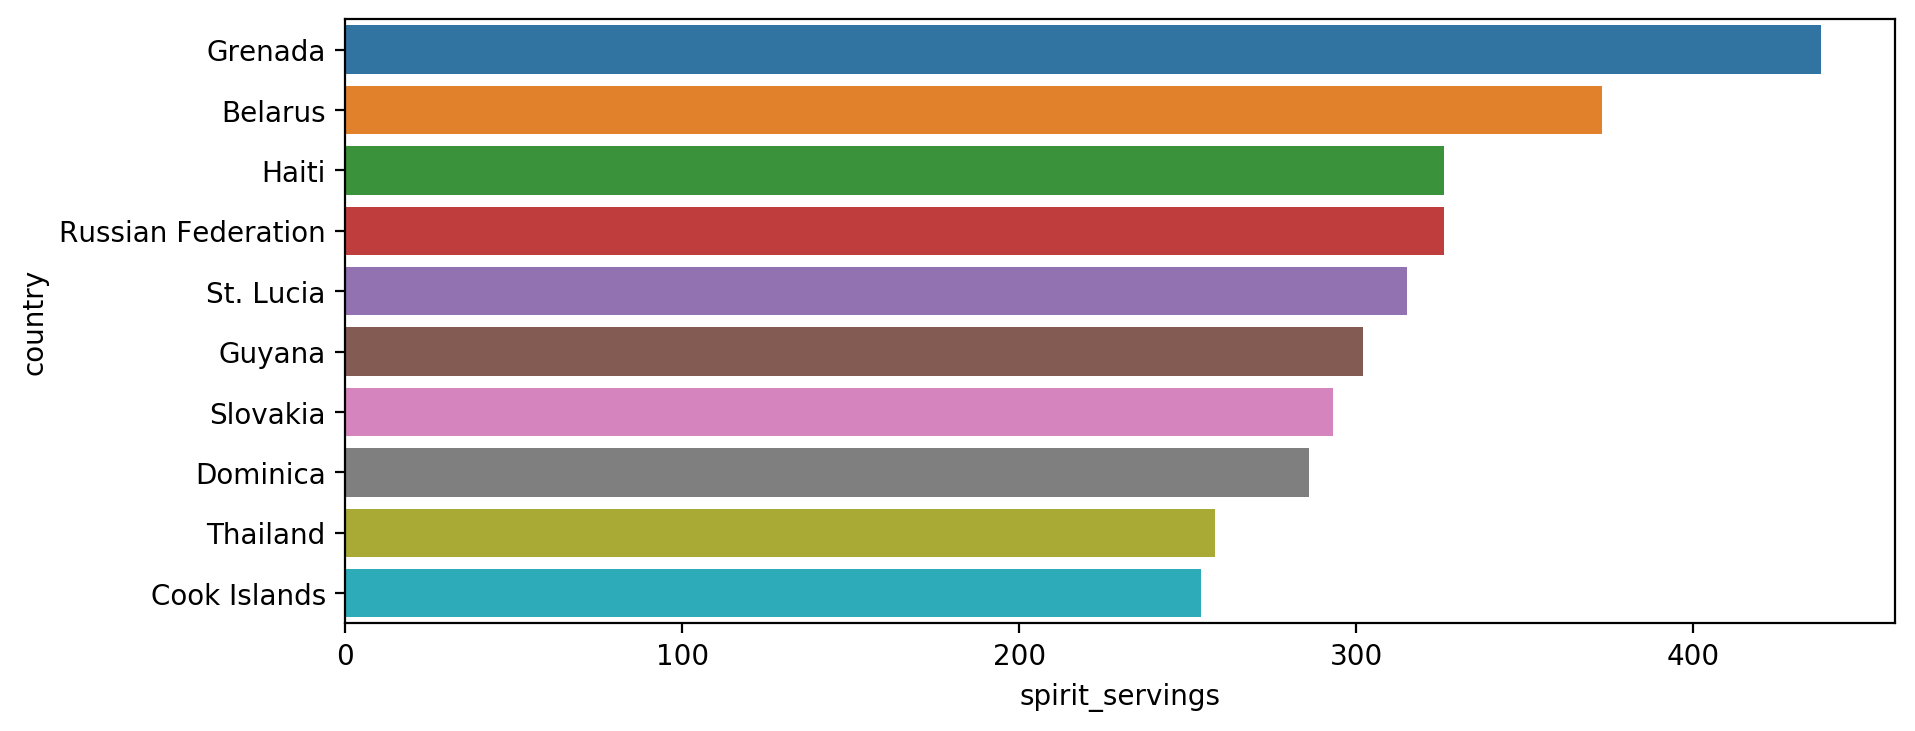

In [11]:
#Top 10 spirit servings countries
spirt = df.groupby("country")["spirit_servings"].max().reset_index().sort_values(by='spirit_servings',ascending=False)[:10]
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(y='country',x="spirit_servings",data=spirt)
plt.yticks(rotation=0)

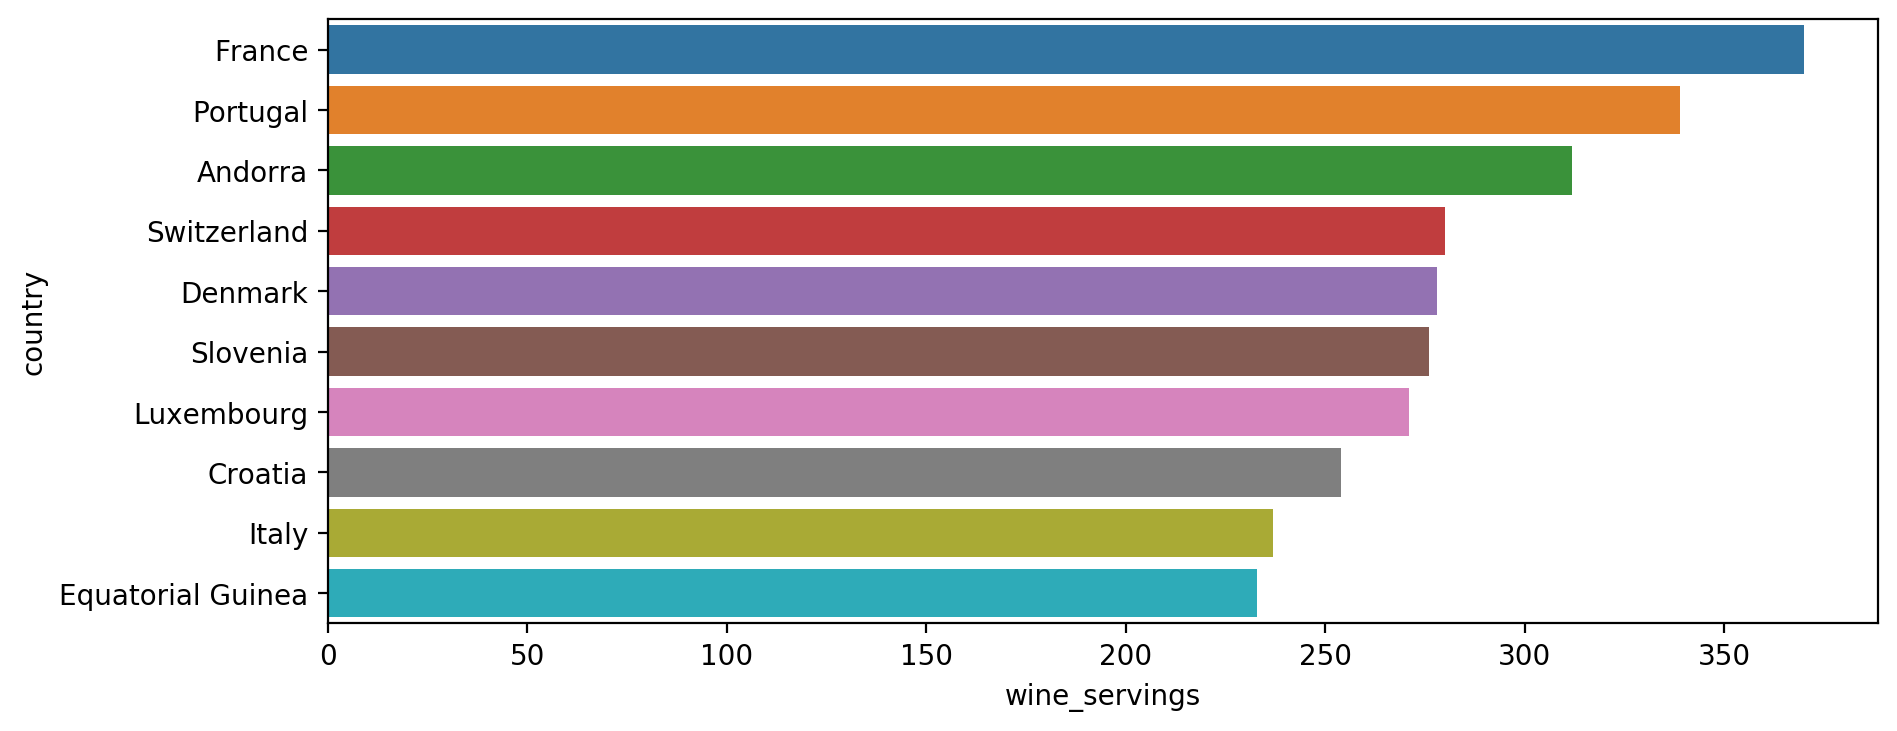

In [12]:
#Top 10 wine servings countries
wine = df.groupby("country")["wine_servings"].max().reset_index().sort_values(by='wine_servings',ascending=False)[:10]
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(y='country',x="wine_servings",data=wine)
plt.yticks(rotation=0);

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

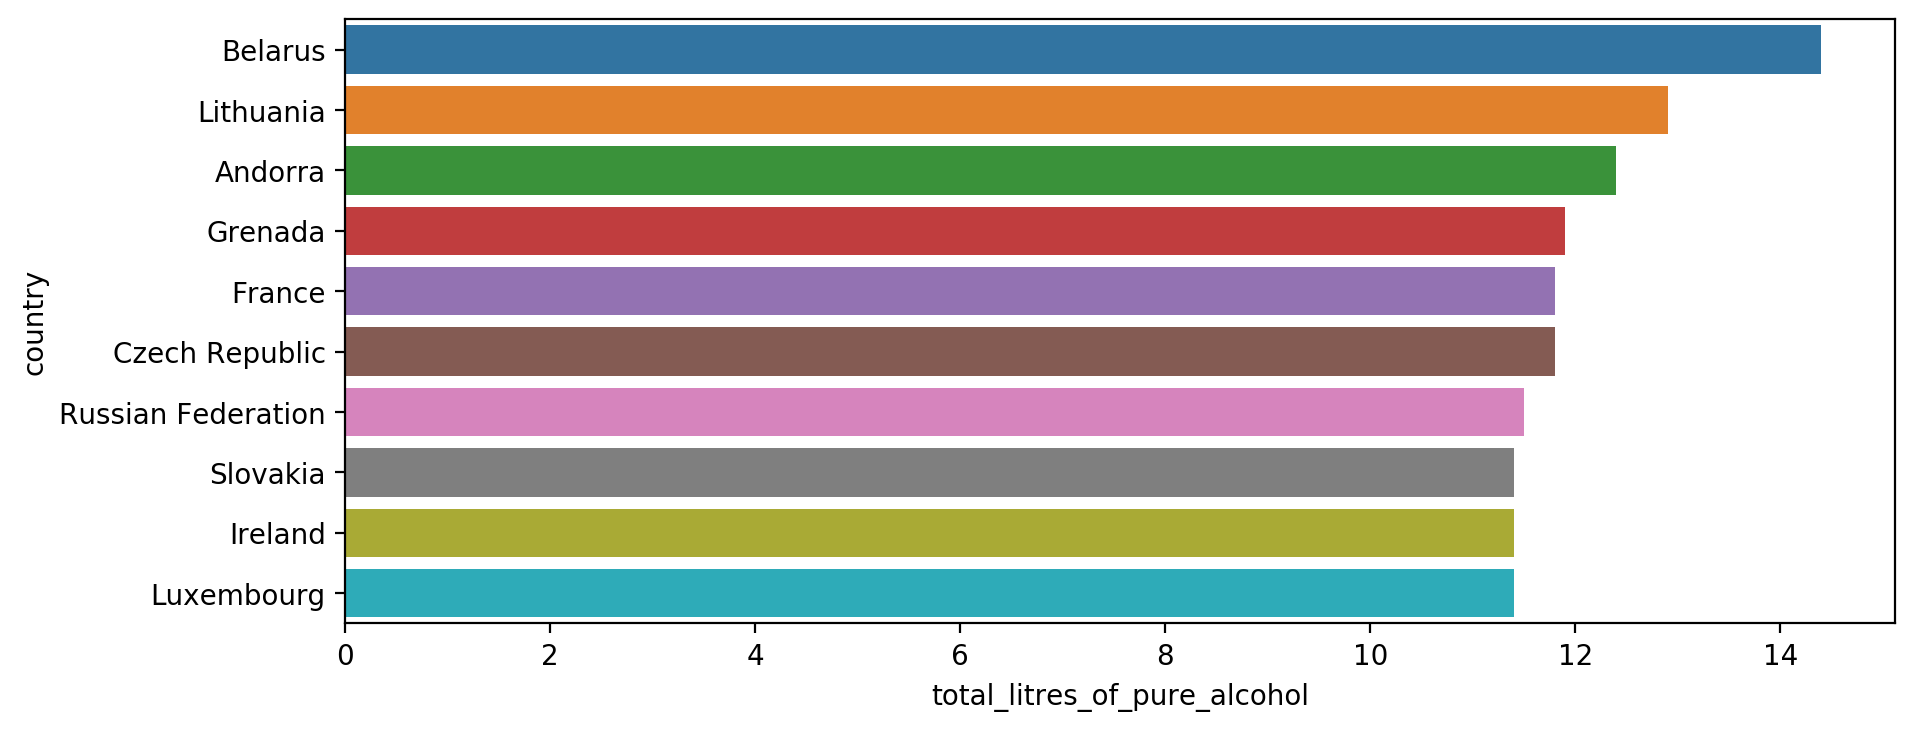

In [13]:
#Top 10 total_litres_of_pure_alcohol countries
alc = df.groupby("country")["total_litres_of_pure_alcohol"].max().reset_index().sort_values(by='total_litres_of_pure_alcohol',ascending=False)[:10]
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(y='country',x="total_litres_of_pure_alcohol",data=alc)
plt.yticks(rotation=0)

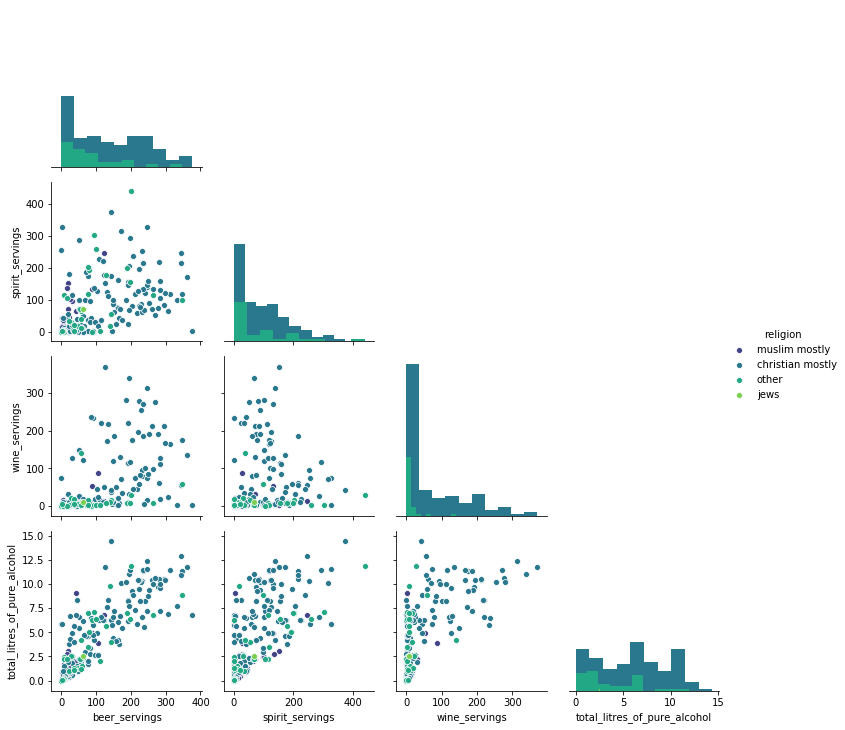

In [14]:
sns.pairplot(df,palette='viridis',
             diag_kind='hist',
             hue="religion",
             corner=True)

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

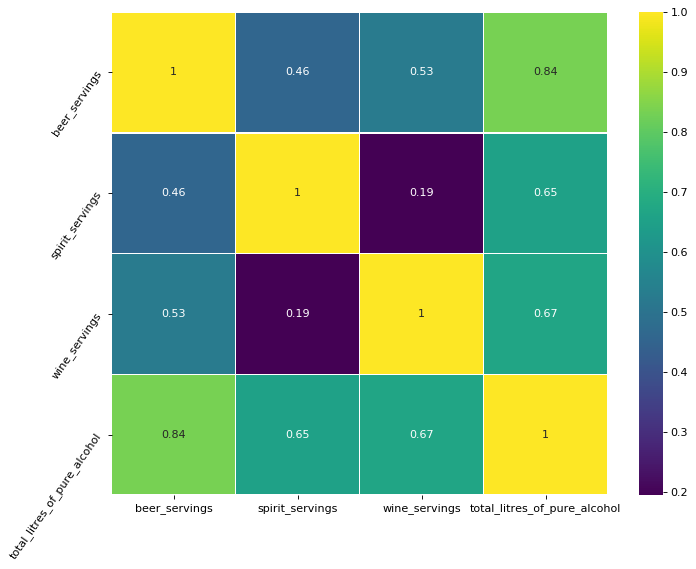

In [15]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(df.corr(),cmap="viridis",annot=True,linewidth=0.5)
plt.yticks(rotation=55)

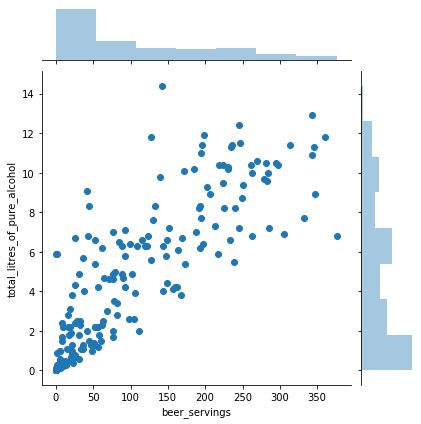

In [17]:
sns.jointplot(x='beer_servings',y='total_litres_of_pure_alcohol',data=df)

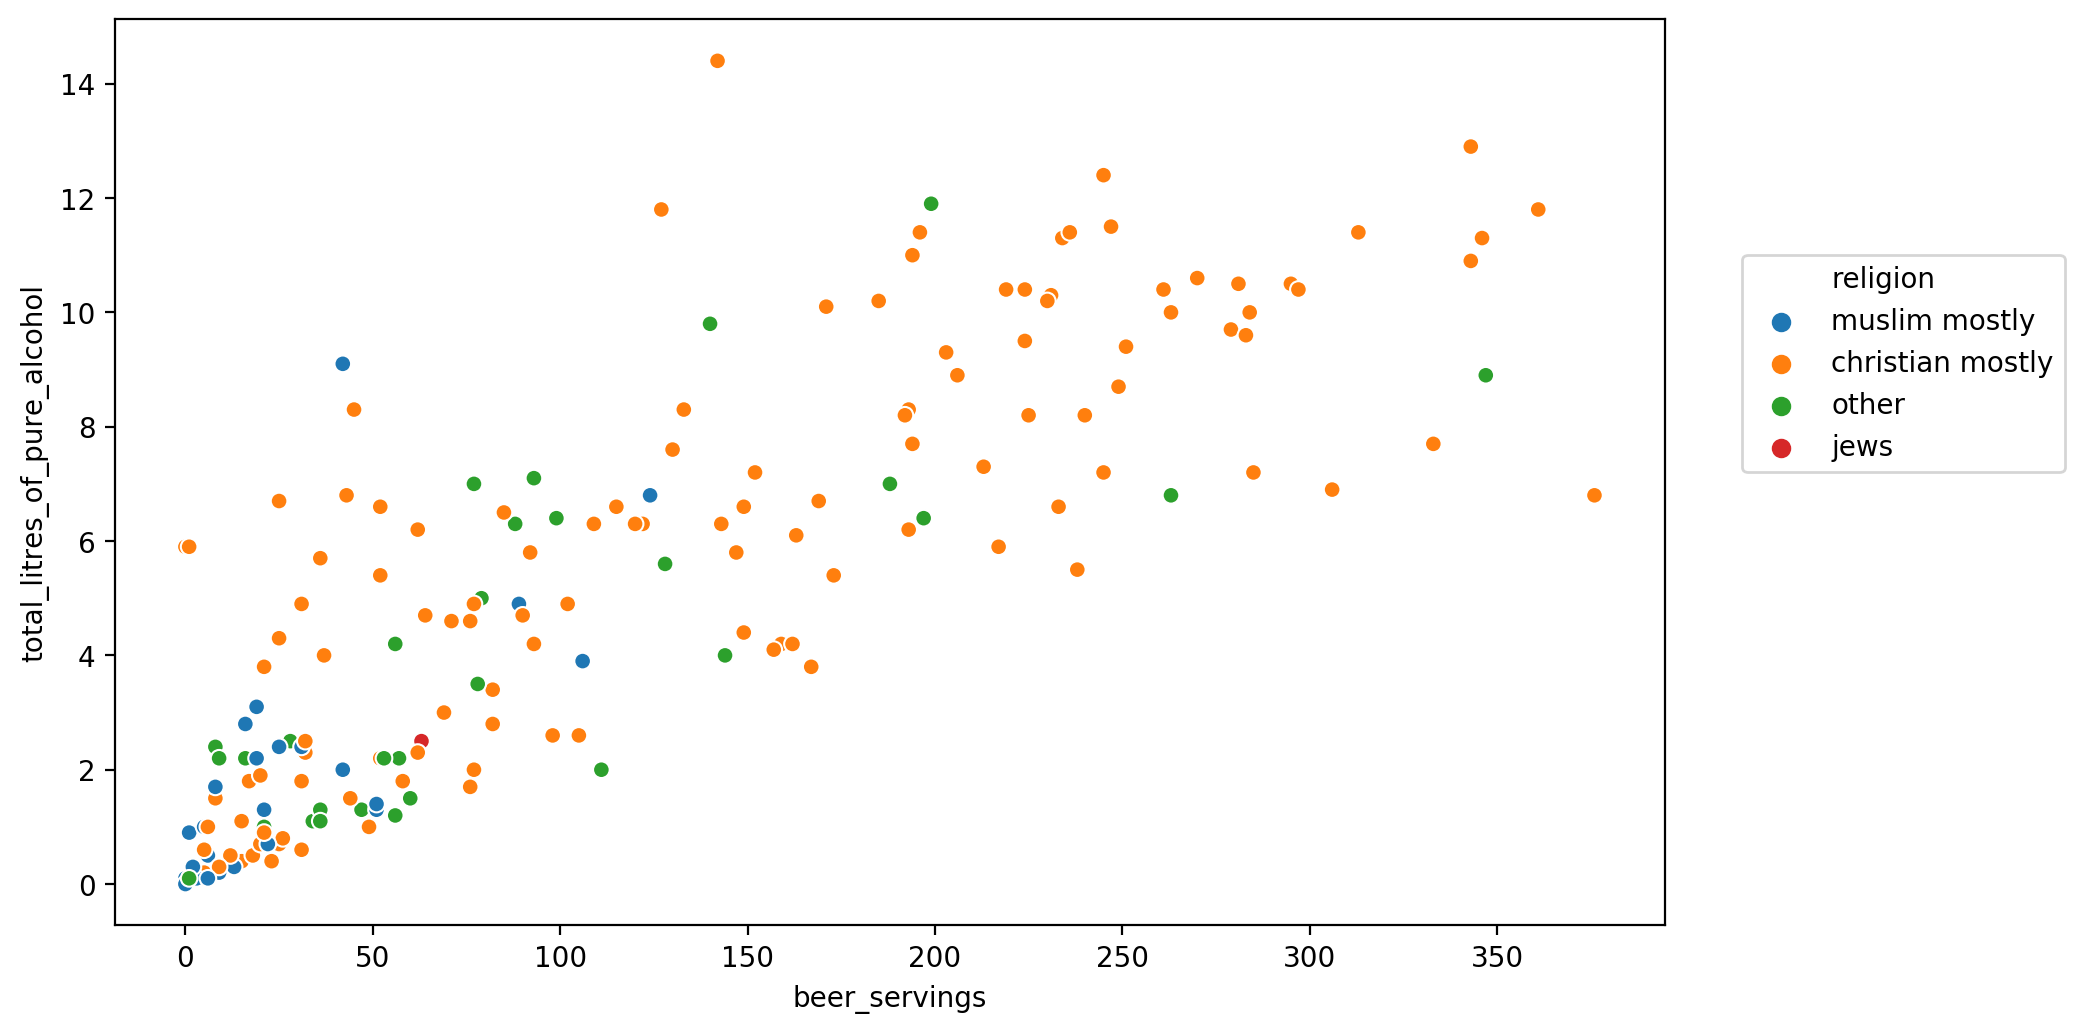

In [18]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='beer_servings',y='total_litres_of_pure_alcohol',hue="religion")
plt.legend(loc=(1.05,0.5))

In [19]:
df["total_alcohol"] = df.beer_servings + df.wine_servings + df.spirit_servings + df.total_litres_of_pure_alcohol

In [20]:
df.groupby("religion")[["beer_servings","wine_servings","spirit_servings","total_litres_of_pure_alcohol"]].sum()

,beer_servings,wine_servings,spirit_servings,total_litres_of_pure_alcohol
religion,,,,
christian mostly,16940,8866,11444,733.5
jews,63,9,69,2.5
muslim mostly,722,273,1261,49.8
other,2764,396,2858,124.6


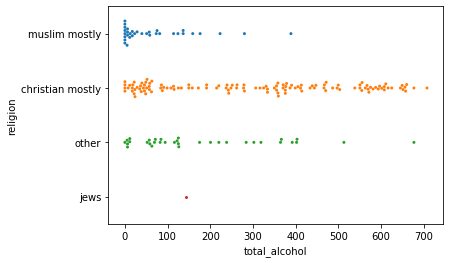

In [21]:
sns.swarmplot(x='total_alcohol',y='religion',data=df,size=3)

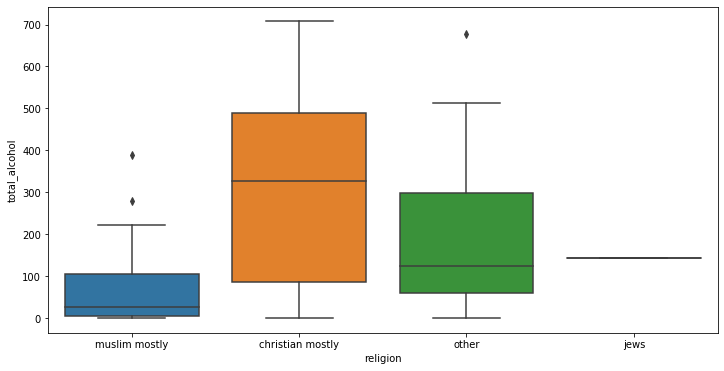

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x='religion',y='total_alcohol',data=df)

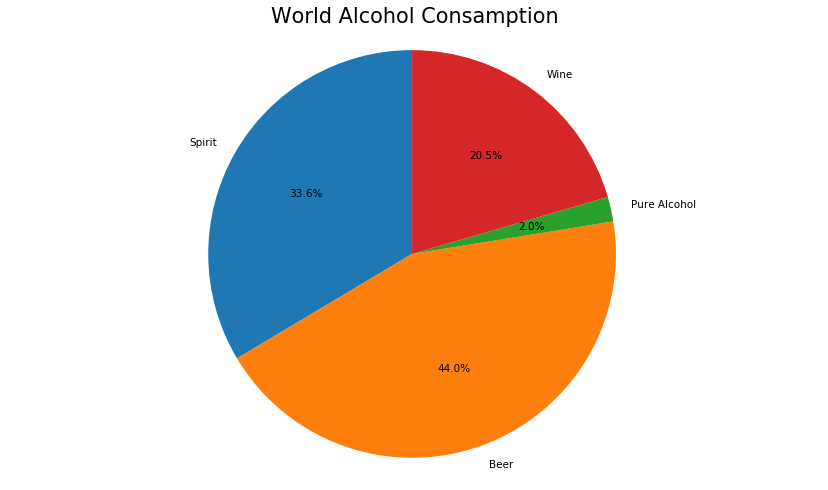

In [23]:
labels = 'Spirit','Beer', 'Pure Alcohol','Wine'
sections = [df.spirit_servings.sum(),
            df.beer_servings.sum(),
            df.total_litres_of_pure_alcohol.sum() ,
            df.wine_servings.sum()]
plt.figure(figsize=(14, 8), dpi=75)
plt.pie(sections, labels=labels,wedgeprops=dict( alpha=1),
        startangle=90,
        #explode = (0,0,0,0),
        autopct = '%0.1f%%',
         textprops={
                'fontsize': 10, 
                'fontweight': 'normal'}
            )

plt.axis('equal')
plt.title('World Alcohol Consamption',fontsize=20)
plt.show()

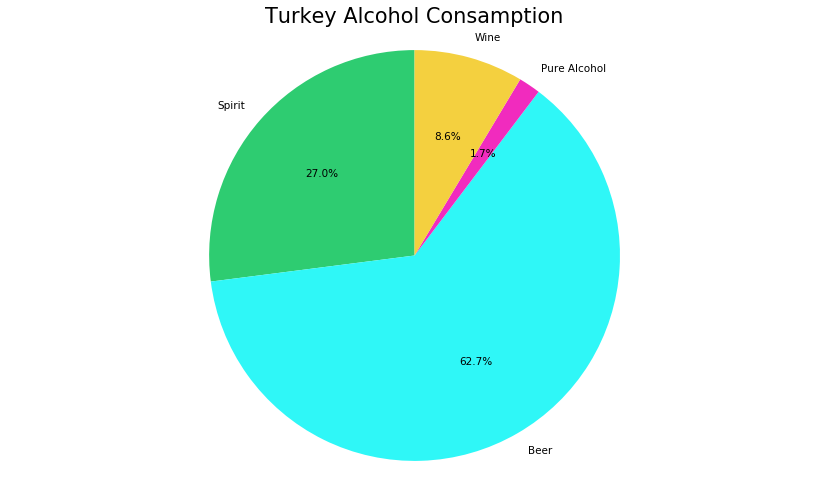

In [24]:
country = df[df["country"]=='Turkey'].iloc[:,1:5]
labels = 'Spirit','Beer', 'Pure Alcohol','Wine'
colors = ['#2ECC71','#2FF7F7','#F12BBE','#F4D03F']
sections = [country.spirit_servings.sum(),
            country.beer_servings.sum(),
            country.total_litres_of_pure_alcohol.sum() ,
            country.wine_servings.sum()]
plt.figure(figsize=(14, 8), dpi=75)
plt.pie(sections, labels=labels,colors=colors,
        startangle=90,
        #explode = (0.5,0.5,0.5,0.5),
        autopct = '%0.1f%%',
         textprops={
                'fontsize': 10, 
                'fontweight': 'normal'}
            )

plt.axis('equal')
plt.title('Turkey Alcohol Consamption',fontsize=20)
plt.show()

In [25]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion,total_alcohol
0,Afghanistan,0,0,0,0.0,muslim mostly,0.0
1,Albania,89,132,54,4.9,muslim mostly,279.9
2,Algeria,25,0,14,0.7,christian mostly,39.7
3,Andorra,245,138,312,12.4,christian mostly,707.4
4,Angola,217,57,45,5.9,christian mostly,324.9


In [26]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
religion                         object
total_alcohol                   float64
dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   religion                      193 non-null    object 
 6   total_alcohol                 193 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ KB


In [28]:
df.corr().describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,total_alcohol
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.739915,0.605194,0.621435,0.818999,0.849867
std,0.234584,0.300328,0.293938,0.155484,0.128337
min,0.458819,0.194797,0.194797,0.654968,0.717387
25%,0.527172,0.458819,0.527172,0.667598,0.717608
50%,0.835839,0.654968,0.667598,0.835839,0.877748
75%,0.877748,0.717387,0.717608,0.936592,0.936592
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df.mean()

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
total_alcohol                   241.323316
dtype: float64

In [31]:
df.max()

country                         Zimbabwe
beer_servings                        376
spirit_servings                      438
wine_servings                        370
total_litres_of_pure_alcohol        14.4
religion                           other
total_alcohol                      707.4
dtype: object

In [32]:
df.min()

country                              Afghanistan
beer_servings                                  0
spirit_servings                                0
wine_servings                                  0
total_litres_of_pure_alcohol                 0.0
religion                        christian mostly
total_alcohol                                0.0
dtype: object

In [33]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "country" is
 Afghanistan                     1
Libya                           1
Niger                           1
Nigeria                         1
Niue                            1
Norway                          1
Oman                            1
Pakistan                        1
Palau                           1
Panama                          1
Papua New Guinea                1
Paraguay                        1
Peru                            1
Philippines                     1
Poland                          1
Portugal                        1
Qatar                           1
South Korea                     1
Moldova                         1
Romania                         1
Russian Federation              1
Rwanda                          1
St. Kitts & Nevis               1
Nicaragua                       1
New Zealand                     1
Netherlands                     1
Mauritius                       1
Luxembourg                      1
Madagascar

In [34]:
df.skew()

beer_servings                   0.816881
spirit_servings                 1.292148
wine_servings                   1.909473
total_litres_of_pure_alcohol    0.428704
total_alcohol                   0.547091
dtype: float64

In [35]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()

In [38]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion,total_alcohol
0,Afghanistan,0,0,0,0.0,muslim mostly,0.0
1,Albania,89,132,54,4.9,muslim mostly,279.9
2,Algeria,25,0,14,0.7,christian mostly,39.7
3,Andorra,245,138,312,12.4,christian mostly,707.4
4,Angola,217,57,45,5.9,christian mostly,324.9


In [46]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,religion,total_alcohol
0,Afghanistan,0,0,0,0.0,2,0.0
1,Albania,89,132,54,4.9,2,279.9
2,Algeria,25,0,14,0.7,0,39.7
3,Andorra,245,138,312,12.4,0,707.4
4,Angola,217,57,45,5.9,0,324.9


In [48]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [49]:
object_col

['country']

In [51]:
num_col

['beer_servings',
 'spirit_servings',
 'wine_servings',
 'total_litres_of_pure_alcohol',
 'religion',
 'total_alcohol']

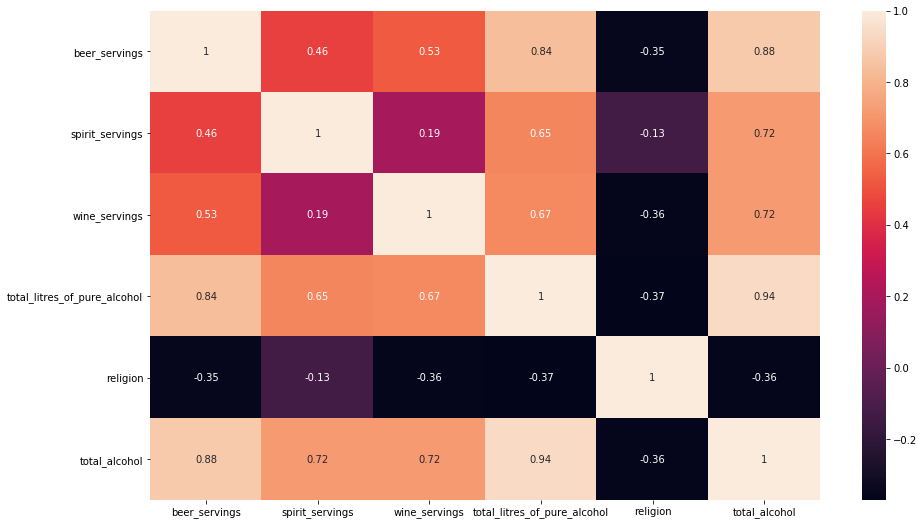

In [52]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

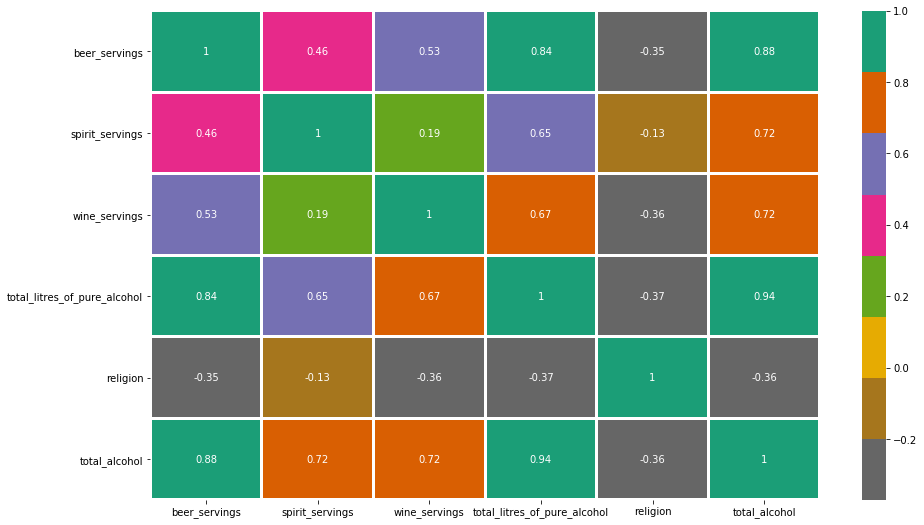

In [53]:
plt.figure(figsize=(15,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [54]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'religion', 'total_alcohol'], dtype='object')

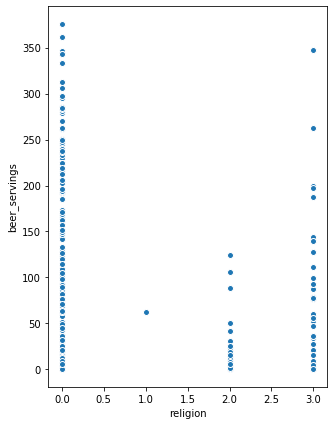

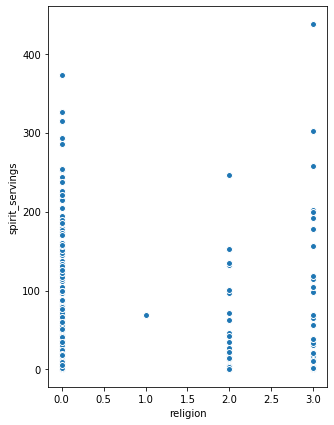

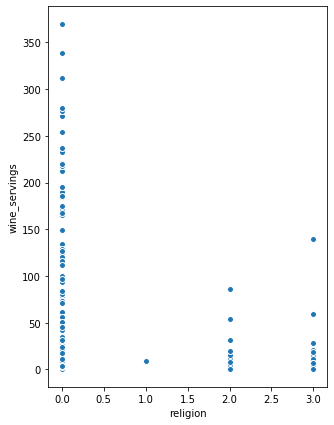

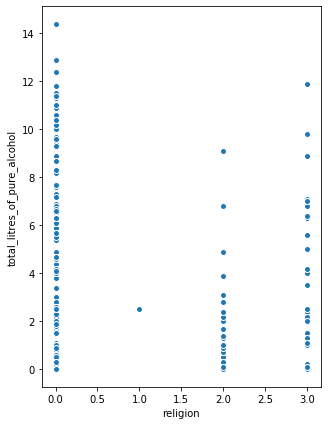

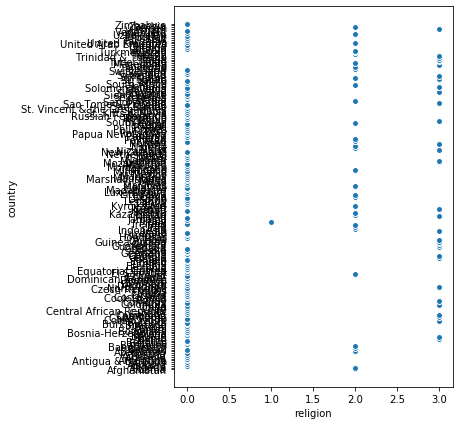

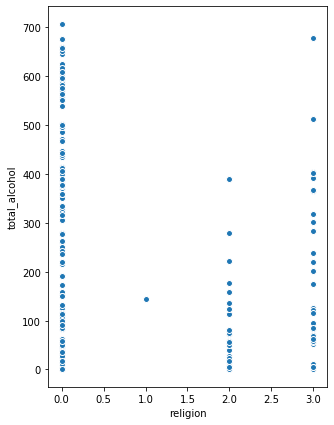

In [56]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'country', 'total_alcohol']:
    plt.figure(figsize=(5,7))
    sns.scatterplot(x=df.religion,y=df[i],data=df,linewidth=1)
    plt.show()

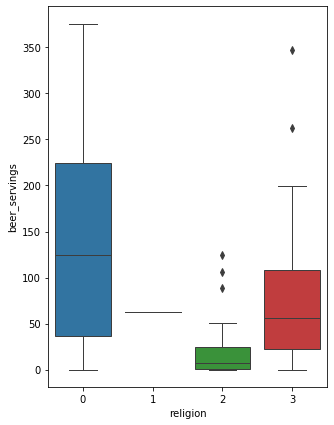

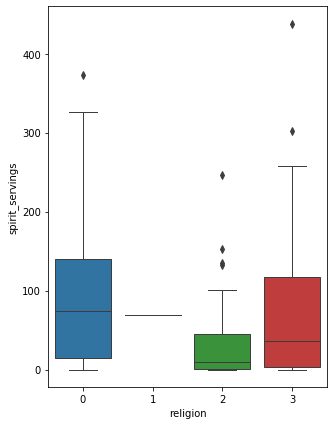

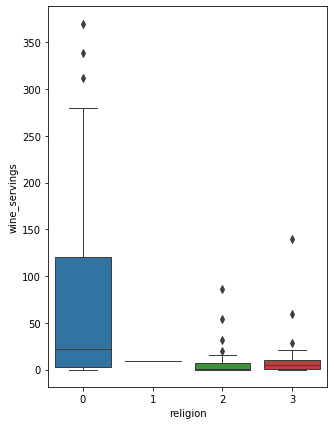

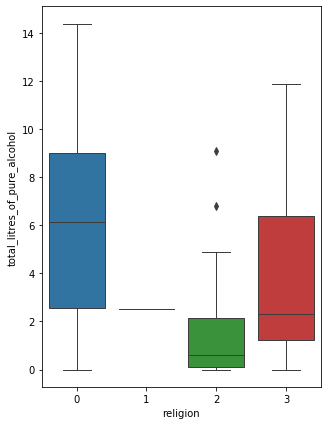

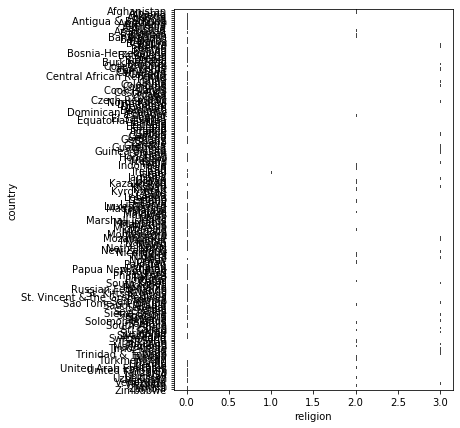

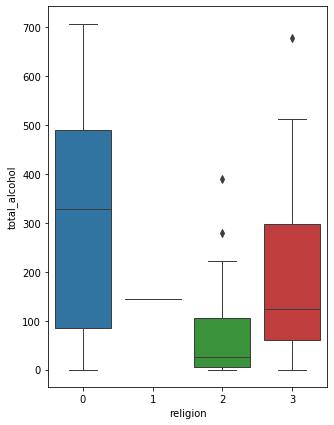

In [57]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'country', 'total_alcohol']:
    plt.figure(figsize=(5,7))
    sns.boxplot(x=df.religion,y=df[i],data=df,linewidth=1)
    plt.show()

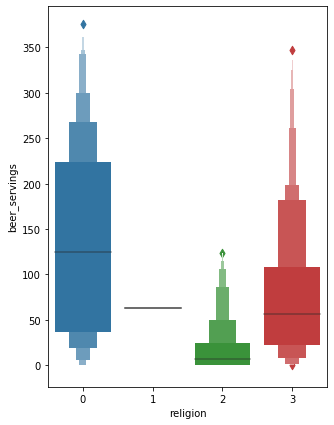

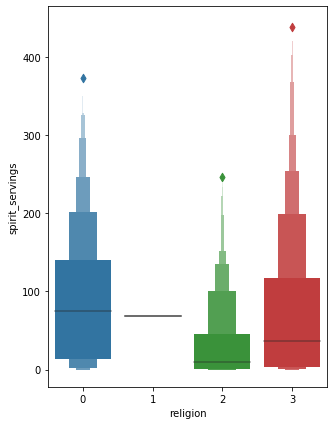

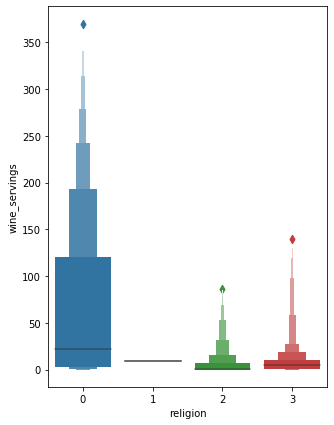

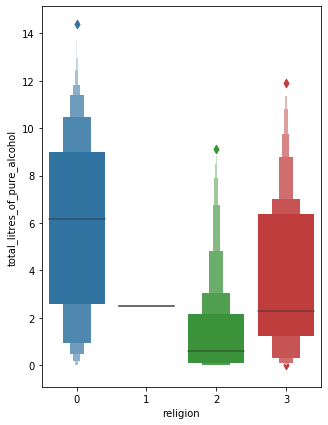

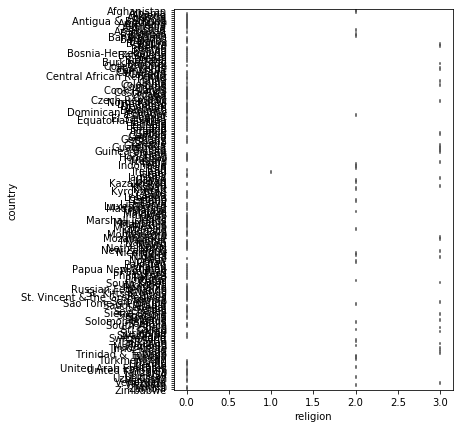

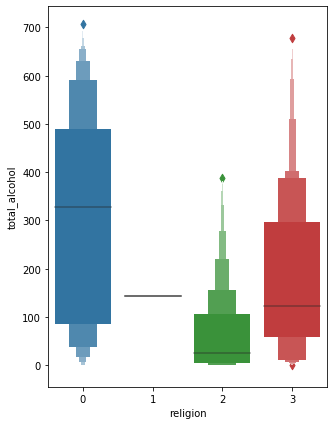

In [58]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'country', 'total_alcohol']:
    plt.figure(figsize=(5,7))
    sns.boxenplot(x=df.religion,y=df[i],data=df,linewidth=1)
    plt.show()

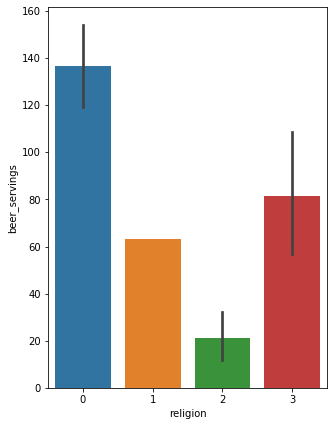

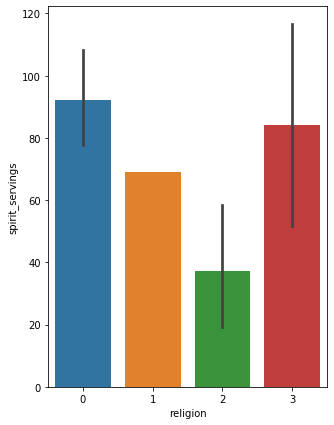

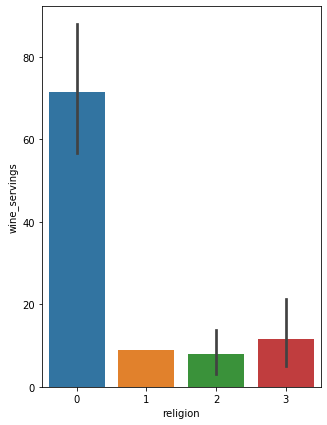

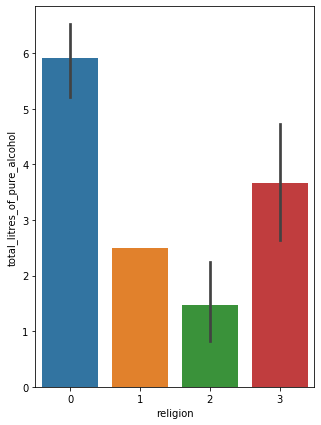

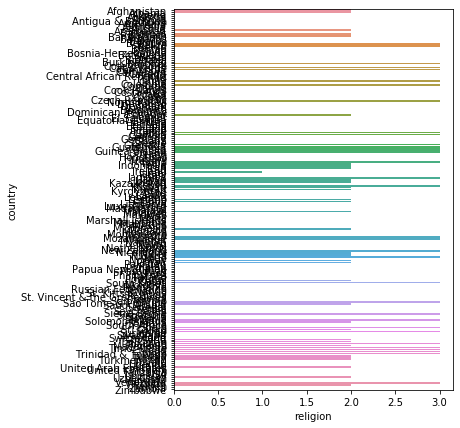

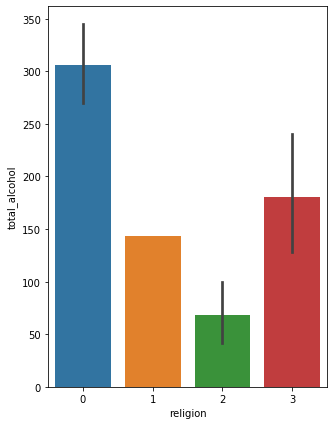

In [59]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'country', 'total_alcohol']:
    plt.figure(figsize=(5,7))
    sns.barplot(x=df.religion,y=df[i],data=df,linewidth=1)
    plt.show()

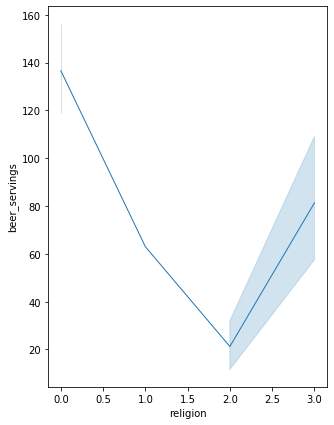

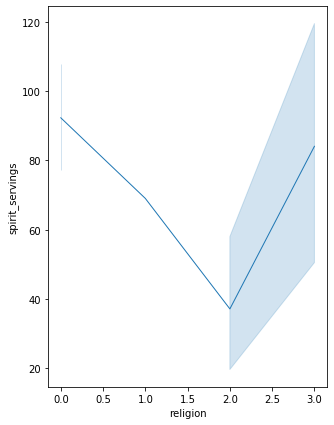

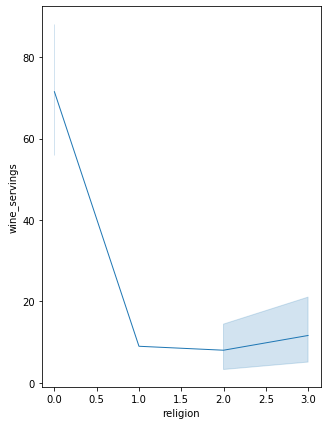

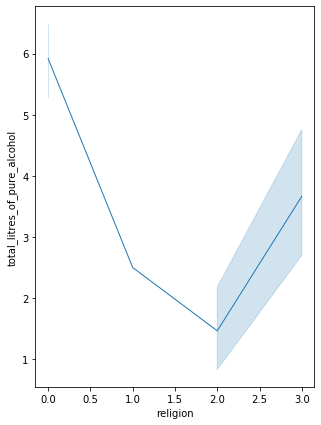

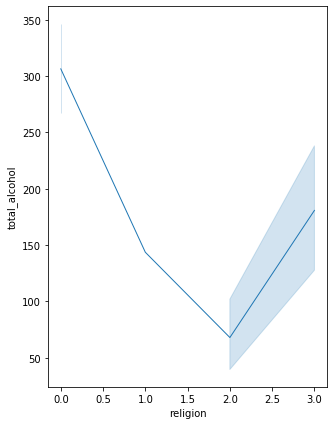

In [62]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'total_alcohol']:
    plt.figure(figsize=(5,7))
    sns.lineplot(x=df.religion,y=df[i],data=df,linewidth=1)
    plt.show()

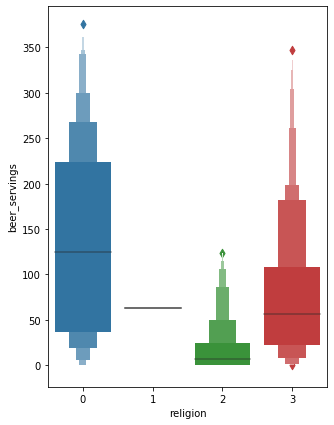

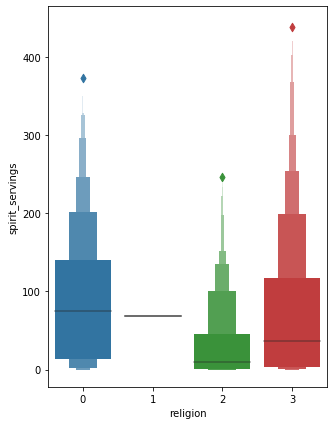

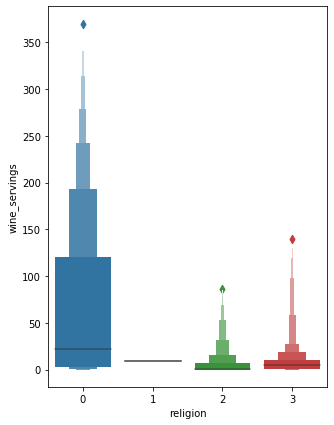

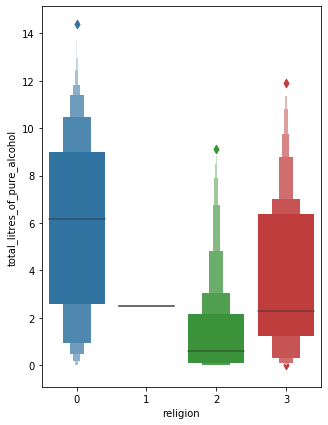

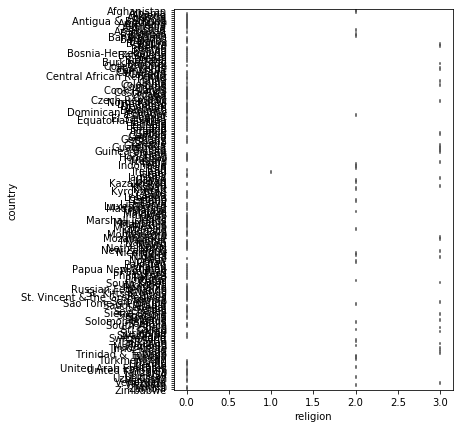

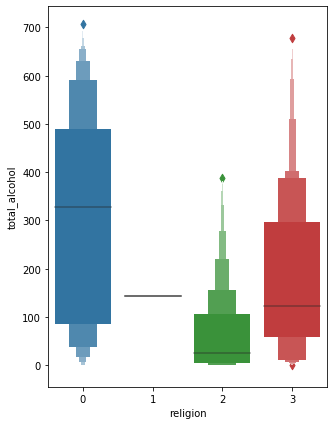

In [63]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'country', 'total_alcohol']:
    plt.figure(figsize=(5,7))
    sns.lvplot(x=df.religion,y=df[i],data=df,linewidth=1)
    plt.show()

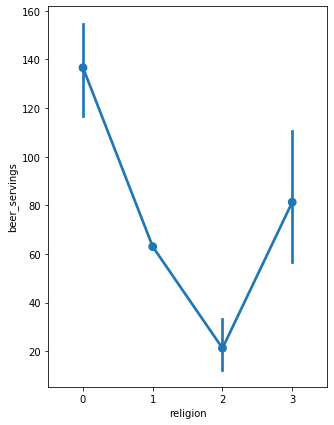

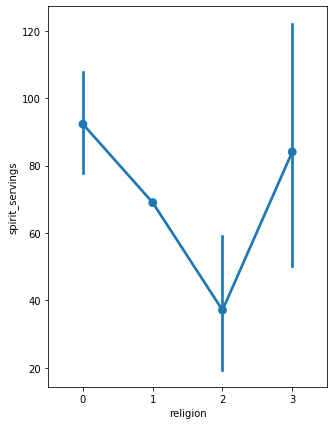

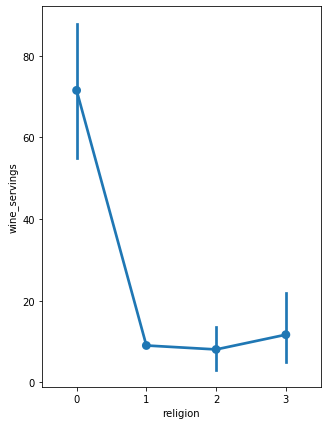

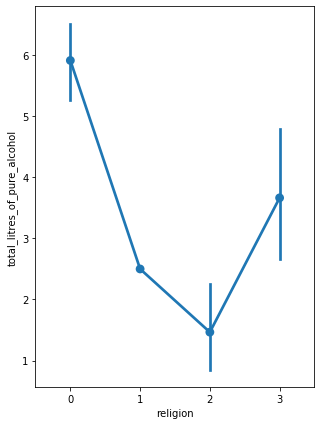

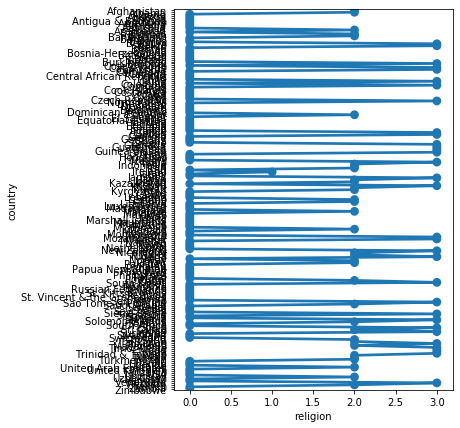

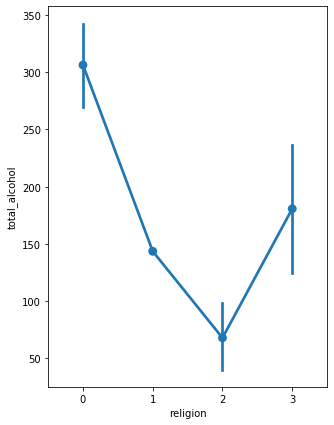

In [64]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'country', 'total_alcohol']:
    plt.figure(figsize=(5,7))
    sns.pointplot(x=df.religion,y=df[i],data=df,linewidth=1)
    plt.show()

<Figure size 360x504 with 0 Axes>

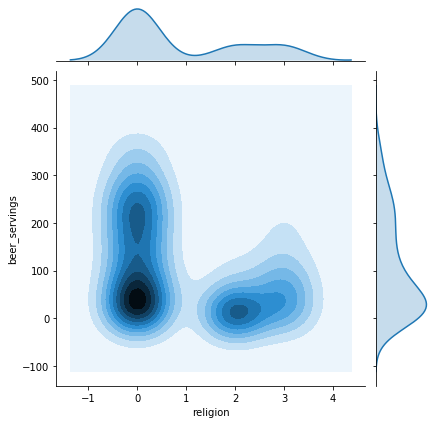

<Figure size 360x504 with 0 Axes>

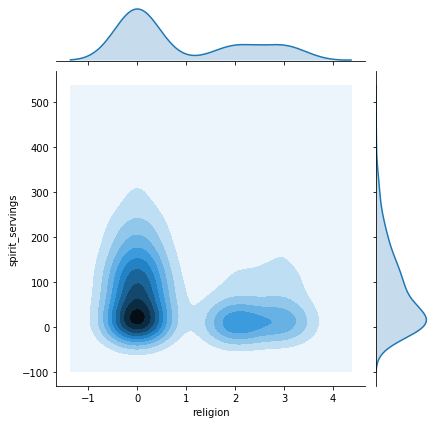

<Figure size 360x504 with 0 Axes>

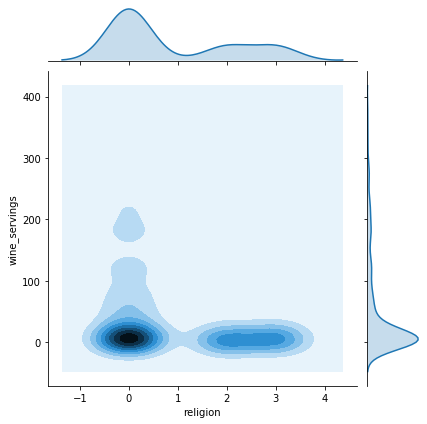

<Figure size 360x504 with 0 Axes>

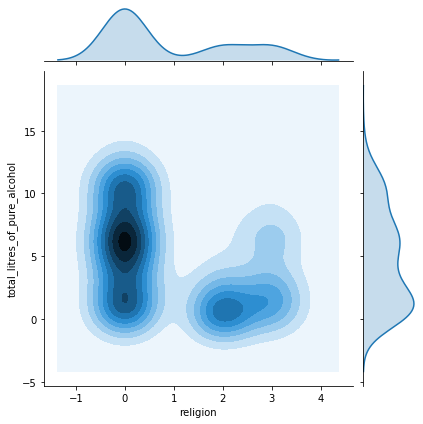

<Figure size 360x504 with 0 Axes>

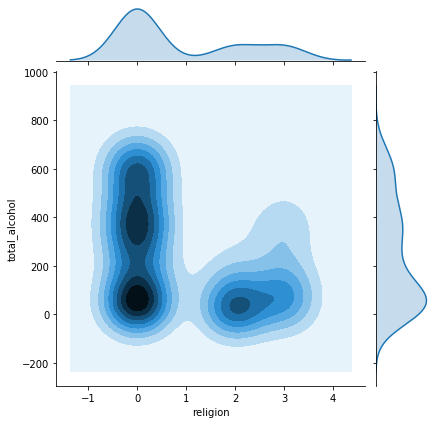

In [65]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'total_alcohol']:
    plt.figure(figsize=(5,7))
    sns.jointplot(x=df.religion,y=df[i],data=df,linewidth=1,kind='kde')
    plt.show()

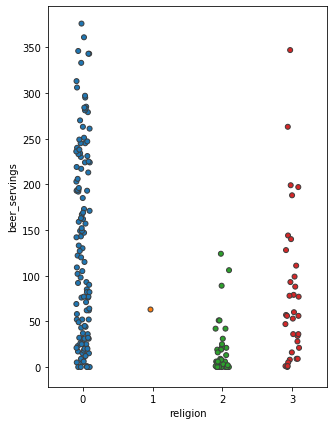

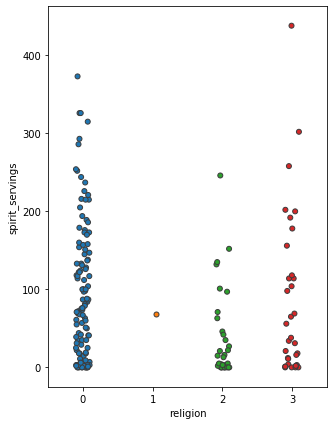

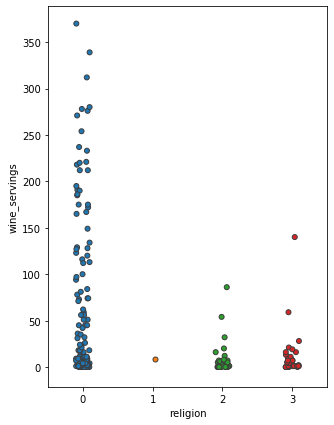

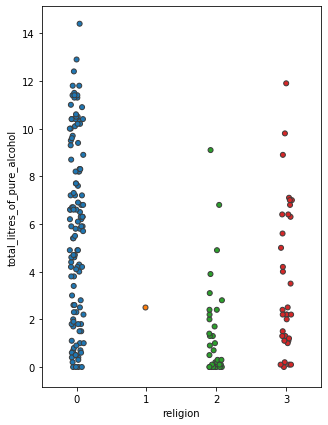

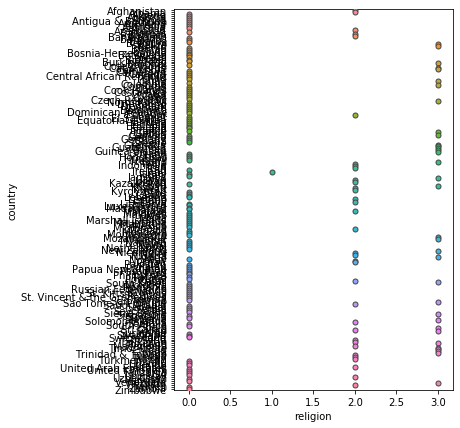

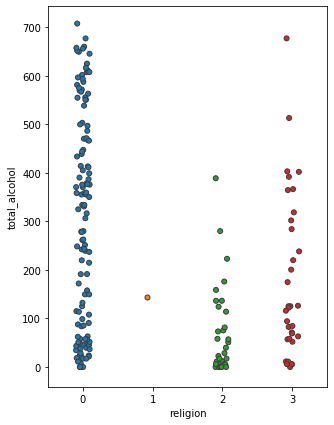

In [66]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'country', 'total_alcohol']:
    plt.figure(figsize=(5,7))
    sns.stripplot(x=df.religion,y=df[i],data=df,linewidth=1)
    plt.show()

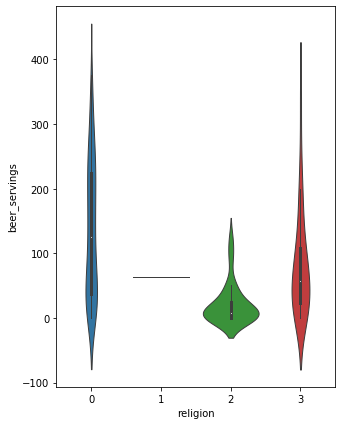

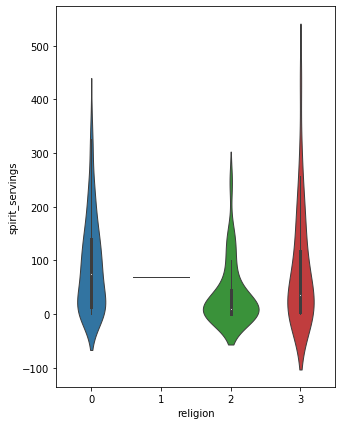

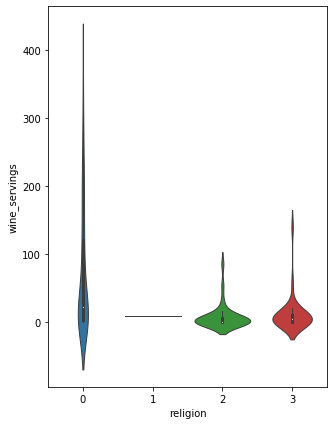

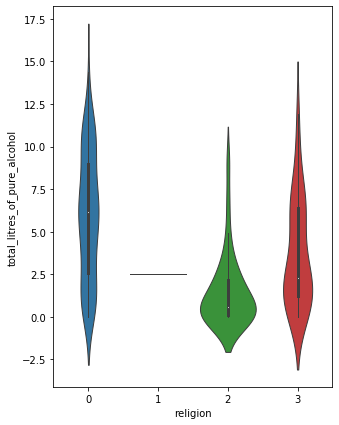

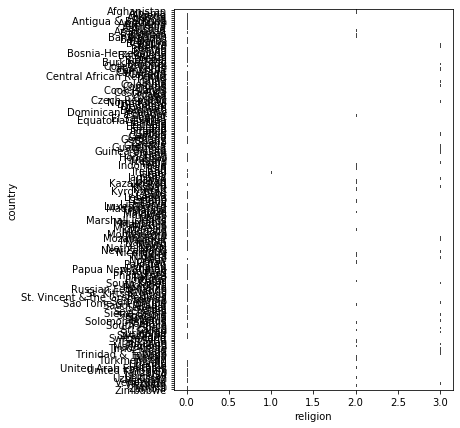

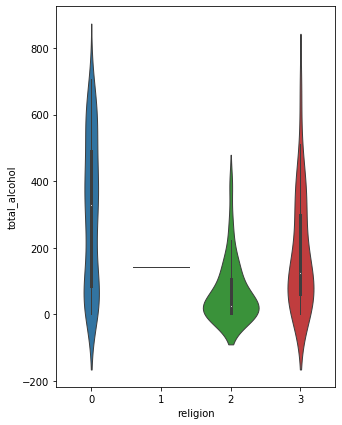

In [67]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'country', 'total_alcohol']:
    plt.figure(figsize=(5,7))
    sns.violinplot(x=df.religion,y=df[i],data=df,linewidth=1)
    plt.show()

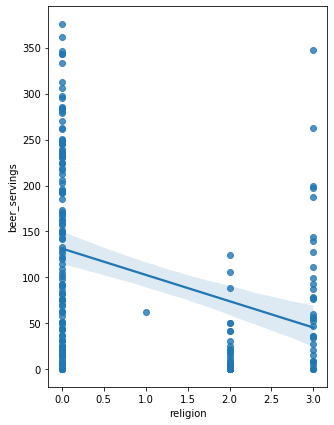

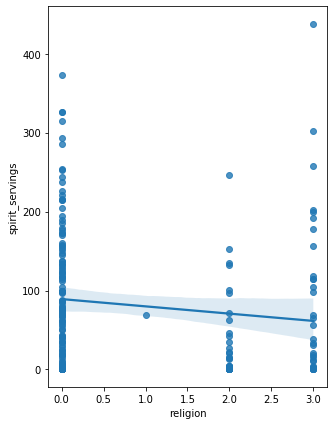

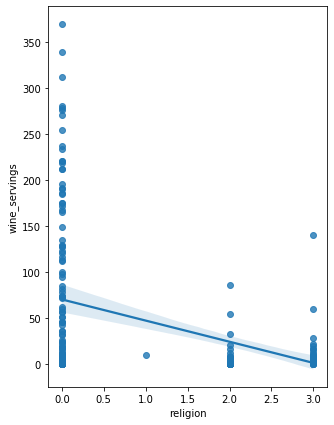

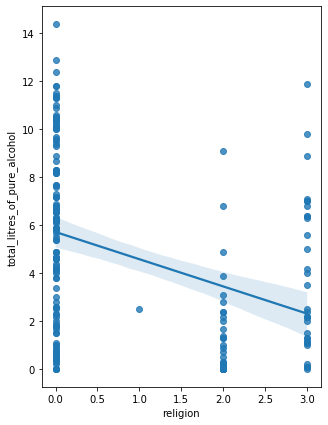

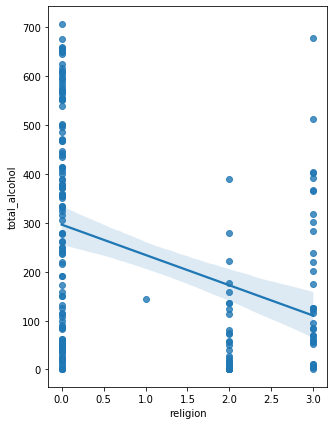

In [70]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'total_alcohol']:
    plt.figure(figsize=(5,7))
    sns.regplot(x=df.religion,y=df[i],data=df)
    plt.show()

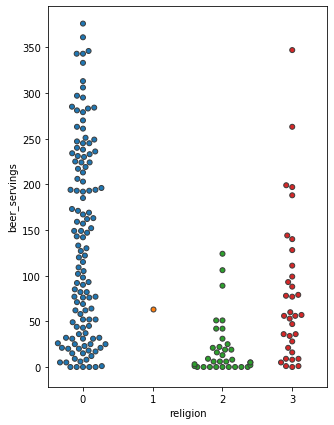

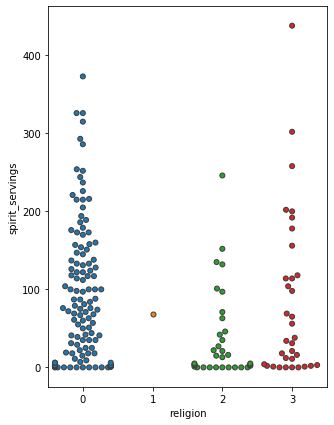

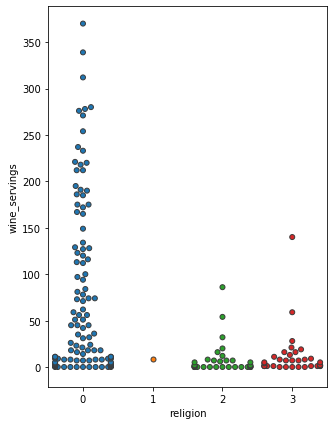

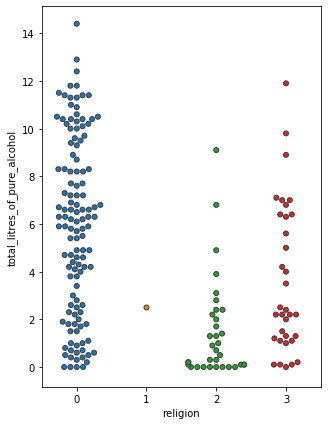

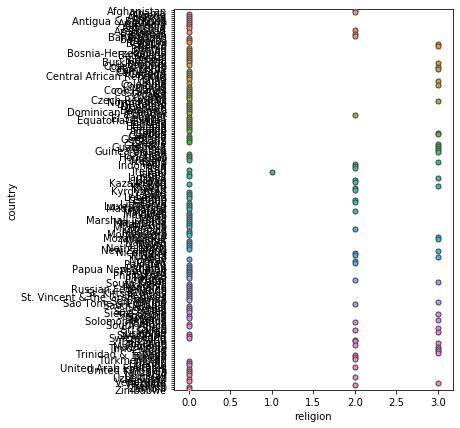

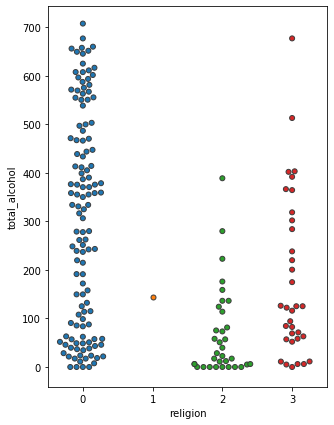

In [71]:
for i in ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'country', 'total_alcohol']:
    plt.figure(figsize=(5,7))
    sns.swarmplot(x=df.religion,y=df[i],data=df,linewidth=1)
    plt.show()

In [72]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'religion', 'total_alcohol'], dtype='object')

In [74]:
import sweetviz as sv

In [75]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [76]:
from IPython.display import IFrame

In [78]:
IFrame(src='Analyze.html',width=1000,height=600)